In [1]:
import math
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('twitchdata-update.csv')
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


Change categorical value on non-categorical value

In [3]:
df['Partnered'] = df['Partnered'].astype('category')
df['Partnered'] = df['Partnered'].cat.codes

df['Mature'] = df['Mature'].astype('category')
df['Mature'] = df['Mature'].cat.codes

df['Language'] = df['Language'].astype('category')
df['Language'] = df['Language'].cat.codes

df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,3
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,3
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,14
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,3
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,1,0,17
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,1,0,11
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,1,0,11
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,1,0,3


Check if this change create null information on dataset

In [4]:
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

Remove Followers column cause we will predict it

Remove Channel column because it's useless

In [5]:
X = df.drop(columns='Followers')
X = X.drop(columns='Channel')
X

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers gained,Views gained,Partnered,Mature,Language
0,6196161750,215250,222720,27716,1734810,93036735,1,0,3
1,6091677300,211845,310998,25610,1370184,89705964,1,0,3
2,5644590915,515280,387315,10976,1023779,102611607,1,1,14
3,3970318140,517740,300575,7714,703986,106546942,1,0,3
4,3671000070,123660,285644,29602,2068424,78998587,1,0,3
...,...,...,...,...,...,...,...,...,...
995,122524635,13560,21359,9104,562691,2162107,1,0,17
996,122523705,153000,3940,793,52289,4399897,1,0,11
997,122452320,217410,6431,567,-4942,3417970,1,0,11
998,122311065,104745,10543,1153,109111,3926918,1,0,3


In [6]:
y = df['Followers']
y

0      3246298
1      5310163
2      1767635
3      3944850
4      8938903
        ...   
995     601927
996     213212
997     109068
998     547446
999     178553
Name: Followers, Length: 1000, dtype: int64

Init of train

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Import Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
c = lr.intercept_ 
c

288826.7401791023

In [11]:
m = lr.coef_
m

array([ 5.10973093e-04, -5.14920560e-01,  2.27500978e+00, -4.85413655e+00,
        1.28028936e+00, -2.13308119e-03, -2.61790568e+03, -8.03063675e+04,
       -1.88157579e+04])

Note (useless)

Import of the prediction average r2_score

In [12]:
from sklearn.metrics import r2_score
#y_pred_train = lr.predict(X_train)
#y_pred_train
#plt.scatter(y_train, y_pred_train)
#plt.xlabel("Actual Followers")
#plt.ylabel("Predicted Followers")
#plt.show()
#r2_score(y_train, y_pred_train)

In [13]:
y_pred_test = lr.predict(X_test)
y_pred_test.max()

6291607.795237897

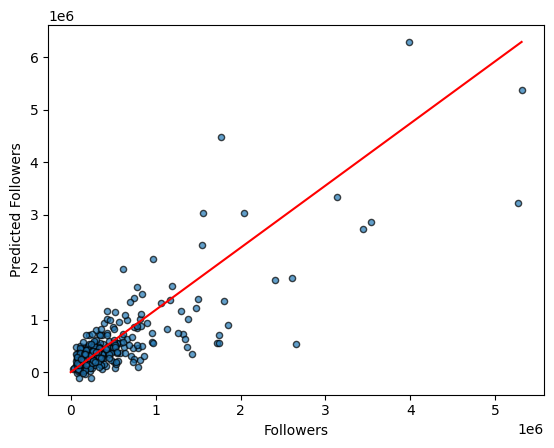

In [14]:
#fig, ax = plt.subplots(figsize = (9, 9))
#ax = plt.axes()
plt.scatter(y_test, y_pred_test, s=20, alpha=0.7, edgecolors="k")
#b, a = np.polyfit(y_test, y_pred_test, deg=1)
#xseq = np.linspace(0, 10, num=100)
plt.xlabel("Followers")
plt.ylabel("Predicted Followers")
#ax.plot(xseq, a + b * xseq, color="lightblue", lw=2.5)
#ax.axis('tight')
plt.plot([0, y_test.max()], [0, y_pred_test.max()], color='red', linestyle='solid')
plt.show()

Average of 60% acuracy between Followers and Predicted Followers

In [15]:
r2_score(y_test, y_pred_test)

0.605420275913034

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e02551f1-9953-47df-879b-6776493df133' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>